In [27]:
%matplotlib notebook

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [29]:
trial_data_df = pd.read_csv("data/clinicaltrial_data.csv")
mouse_data_df = pd.read_csv("data/mouse_drug_data.csv")

In [30]:
combined_clinical_data_df = pd.merge(trial_data_df,
                                     mouse_data_df,
                                     on="Mouse ID")

In [31]:
#This function returns a pivoted data frame for our time series analysis. 

#We first reset the index of the original data frames to remove any current indices.
#Once reset, we can pivot the dataframes, such that: 
# 1. Timepoint becomes the index, 
# 2. The individual drugs become the columns, 
# 3. The mean and sem values become the main data values. 

def pivotDF(df, index, cols, vals):
    df = df.reset_index()
    df = df.pivot(index=index, 
                  columns=cols, 
                  values=vals)
    return df

In [32]:
# get mean tumor volume and then pivot dataframe for time series analysis              
mean_tumor_volume_df = combined_clinical_data_df.groupby(["Drug", "Timepoint"]).mean()[["Tumor Volume (mm3)"]]
mean_tumor_volume_df = pivotDF(df = mean_tumor_volume_df, 
                                index="Timepoint", 
                                cols="Drug", 
                                vals="Tumor Volume (mm3)")

# get SEM tumor volume and then pivot dataframe for time series analysis   
sem_tumor_volume_df = combined_clinical_data_df.groupby(["Drug", "Timepoint"]).sem()[["Tumor Volume (mm3)"]]
sem_tumor_volume_df = pivotDF(df = sem_tumor_volume_df, 
                                index="Timepoint", 
                                cols="Drug", 
                                vals="Tumor Volume (mm3)")

mean_tumor_volume_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [33]:

#This function is called for each of our three our scatter/line plots. 
#We create a function, instead of charting each one individually, so that we can set 
#default formatting options governing the major chart features, while still providing an override on 
#some of the options 

def chartTrialOutcomes(val_df, sem_df, title, xlabel, ylabel, file,
                       xlim_offset = [0,0], ylim_offset=[0,0],
                       vlines = False, hlines = True,
                       legend_loc = "best" ):
    
    fig, ax = plt.subplots()
    x_axis = val_df.index
    
    #individual columns to output. These can be updated at will. 
    columns_to_chart = ["Capomulin","Infubinol","Ketapril","Placebo" ]
   
    #line colors to associate with each of the named columns above. We use their position in the list to tie the relationship together. 
    colors = ["red","blue","green","black"]

    #markers to associate with each of the named columns above. We use their position in the list to tie the relationship together. 
    markers = ["o","^","s","D"]
        
    #create a line plot with error bars for each of the named columns
    for i, col in enumerate(columns_to_chart):
        ax.errorbar(x = x_axis,             
                    y = val_df[col],
                    yerr = sem_df[col],
                    c=colors[i], 
                    marker=markers[i], 
                    ls="--", 
                    lw=0.25,
                    label=col)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
 
    #set x-axis values 
    #tickmarks for x axis 
    xticks = [0, 10, 20, 30, 40]
    plt.xticks(xticks)
    #xticks = x_axis
    xmin = min(xticks) + xlim_offset[0]
    xmax = max(xticks) + xlim_offset[1]
    ax.set_xlim(xmin, xmax)   

    
    #set y-axis values
    yticks = ax.get_yticks()
    ymin = min(yticks) + ylim_offset[0]
    ymax = max(yticks) + ylim_offset[1]
    ax.set_ylim(ymin, ymax)
    
    if vlines is True:
        ax.vlines(x=[xticks],ymin=ymin,ymax=ymax,alpha=0.05) 
    if hlines is True:    
        ax.hlines(y=[yticks],xmin=xmin,xmax=xmax,alpha=0.05)    
    
    #set legend - this defaults to "best"
    ax.legend(loc=legend_loc)
    
    plt.savefig(file)

<IPython.core.display.Javascript object>


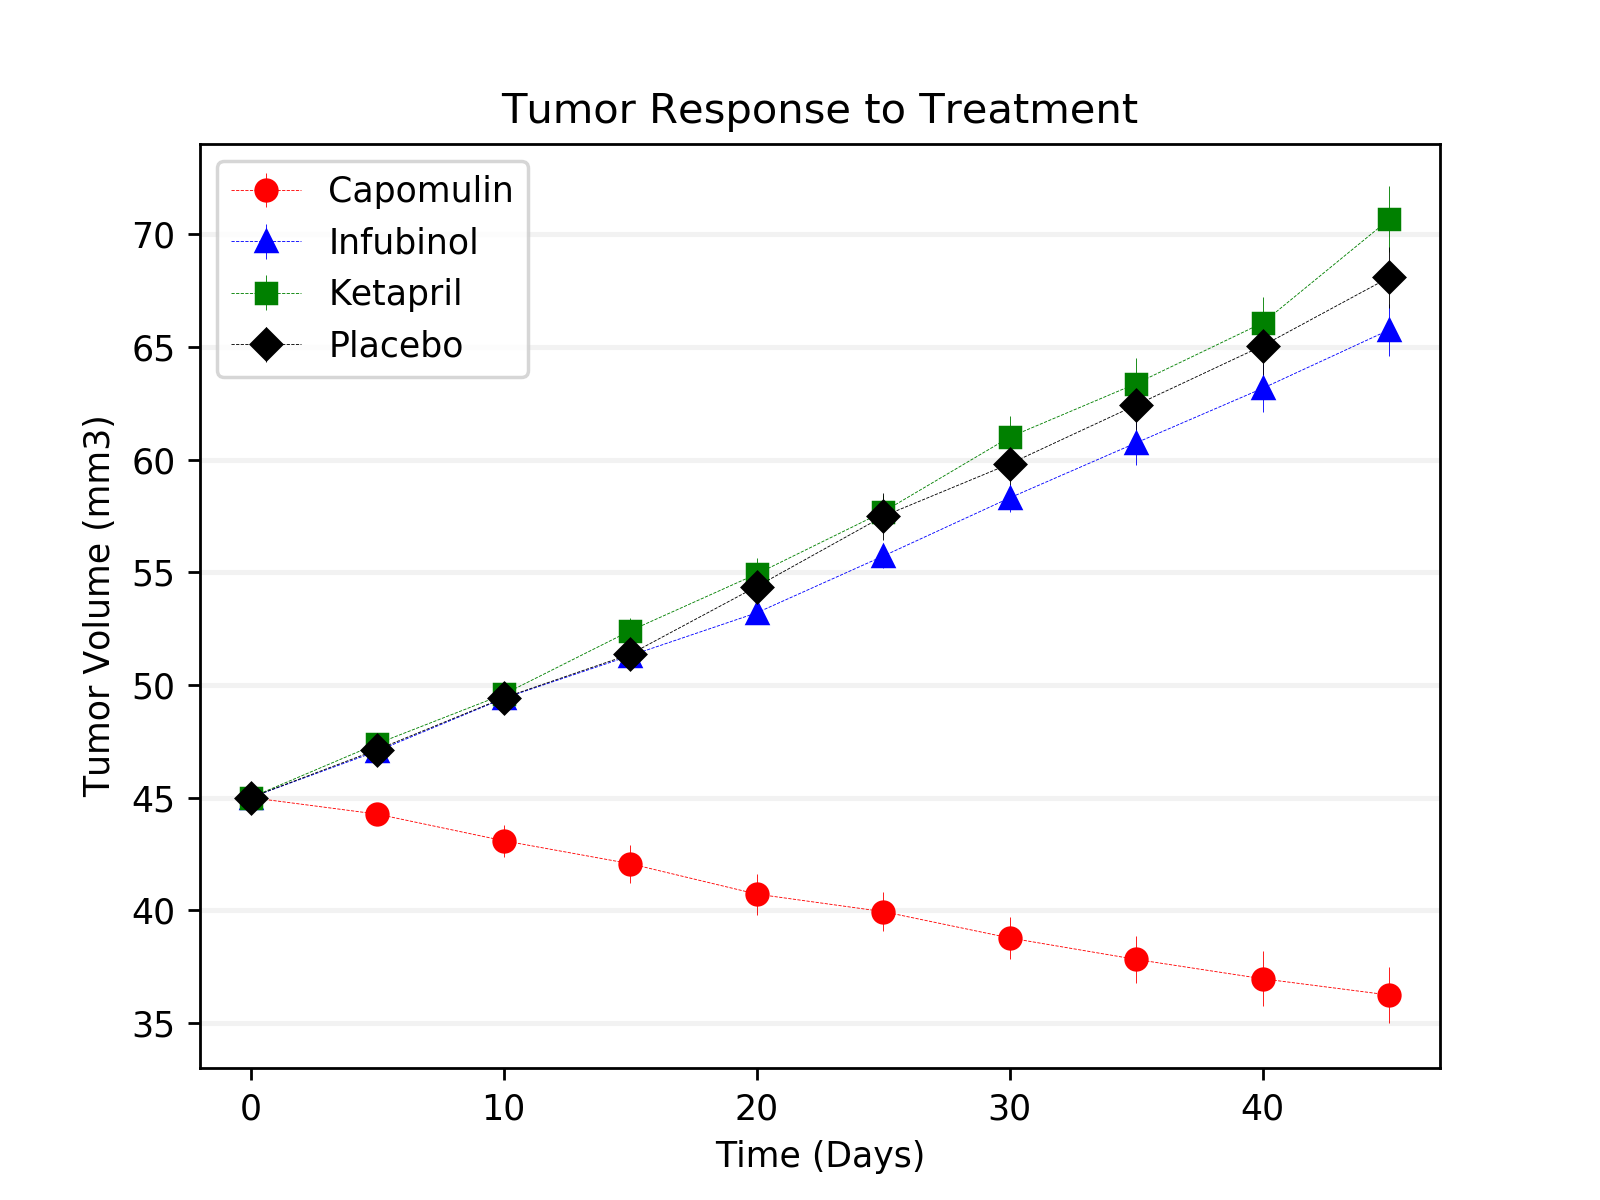

In [34]:
chartTrialOutcomes(val_df = mean_tumor_volume_df, 
                   sem_df = sem_tumor_volume_df,title = "Tumor Response to Treatment", 
                   xlabel = "Time (Days)",
                   ylabel = "Tumor Volume (mm3)", 
                   file = "charts/treatment.png",
                   xlim_offset = [-2,7],
                   ylim_offset = [3, -1])

In [24]:
# get mean number of metastatic sites and then pivot dataframe for time series analysis                 
mean_metastatic_sites_df = combined_clinical_data_df.groupby(["Drug", "Timepoint"]).mean()[["Metastatic Sites"]]
mean_metastatic_sites_df = pivotDF(df = mean_metastatic_sites_df, 
                                    index="Timepoint", 
                                    cols="Drug", 
                                    vals="Metastatic Sites")

# get SEM of metastatic sites  and then pivot dataframe for time series analysis    
sem_metastatic_sites_df = combined_clinical_data_df.groupby(["Drug", "Timepoint"]).sem()[["Metastatic Sites"]]
sem_metastatic_sites_df = pivotDF(df = sem_metastatic_sites_df, 
                                   index="Timepoint", 
                                   cols="Drug", 
                                   vals="Metastatic Sites")

mean_metastatic_sites_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


<IPython.core.display.Javascript object>


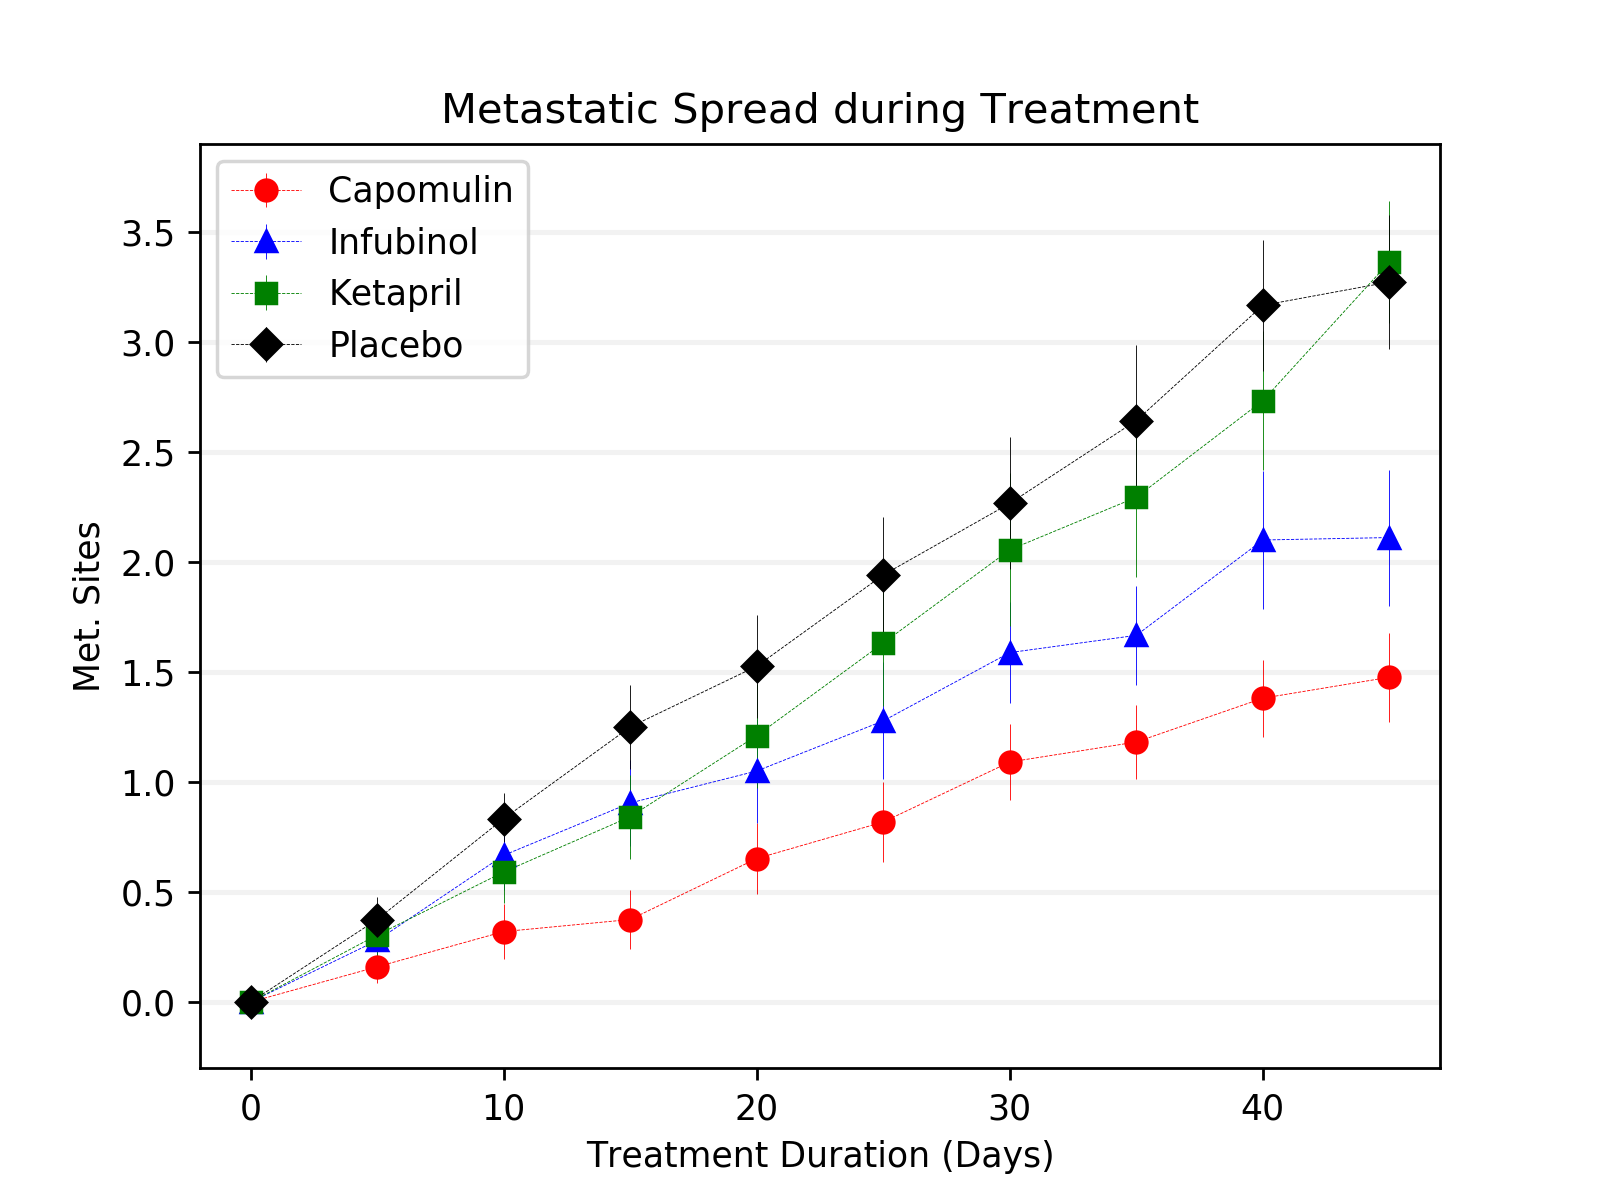

In [35]:
chartTrialOutcomes(val_df = mean_metastatic_sites_df,
                   sem_df = sem_metastatic_sites_df,
                   title = "Metastatic Spread during Treatment", 
                   xlabel = "Treatment Duration (Days)", 
                   ylabel = "Met. Sites", 
                   file = "charts/spread.png",
                   xlim_offset=[-2,7],
                   ylim_offset=[0.2,-0.1])



In [26]:
# get survival count of mice and then pivot dataframe for time series analysis   
count_micesurvived_df = combined_clinical_data_df.groupby(["Drug", "Timepoint"]).count()[["Mouse ID"]]
count_micesurvived_df = pivotDF(df = count_micesurvived_df, 
                                 index="Timepoint", 
                                 cols="Drug", 
                                 vals="Mouse ID")


# deep copy count_micesurvived_df into new df, so we can update the values from a simple count to the survival rate per drug
rate_micesurvived_df = count_micesurvived_df.copy()

#return survival rate by taking the number of mice at the start of each trial, 
#and then reading in the survival count at each time point of the trial.  
def returnSurvivalRate(mice_at_start, count_at_timepoint):
    survival_rate = (1 - ((mice_at_start - count_at_timepoint) / mice_at_start) ) * 100
    return survival_rate

#loop through each column of the new df and apply returnSuvivalRate() for each value in a list comprehension
for col in rate_micesurvived_df.columns:
    mice_at_start = rate_micesurvived_df.loc[0,col]
    rate_micesurvived_df[col] = [returnSurvivalRate(mice_at_start, x) for x in rate_micesurvived_df[col] ]
    
    
count_micesurvived_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [36]:
#chartTrialOutcomes expects a df with SEM scores to calculate error bars, but we don't need error bars 
#for a simple count, so we create a df with error scores of 0 at each point. 

#First, we duplicate the STRUCTURE of rate_micesurvived_df, but do not copy the data. 
#This saves time & memory, while still giving us a perfect structural represenation of our main df 
sem_ratesurvied_df = pd.DataFrame().reindex_like(rate_micesurvived_df)

#then we quickly fill each column and row with 0
for col in sem_ratesurvied_df:
    sem_ratesurvied_df[col] = [0 for x in sem_ratesurvied_df[col]]
    

<IPython.core.display.Javascript object>


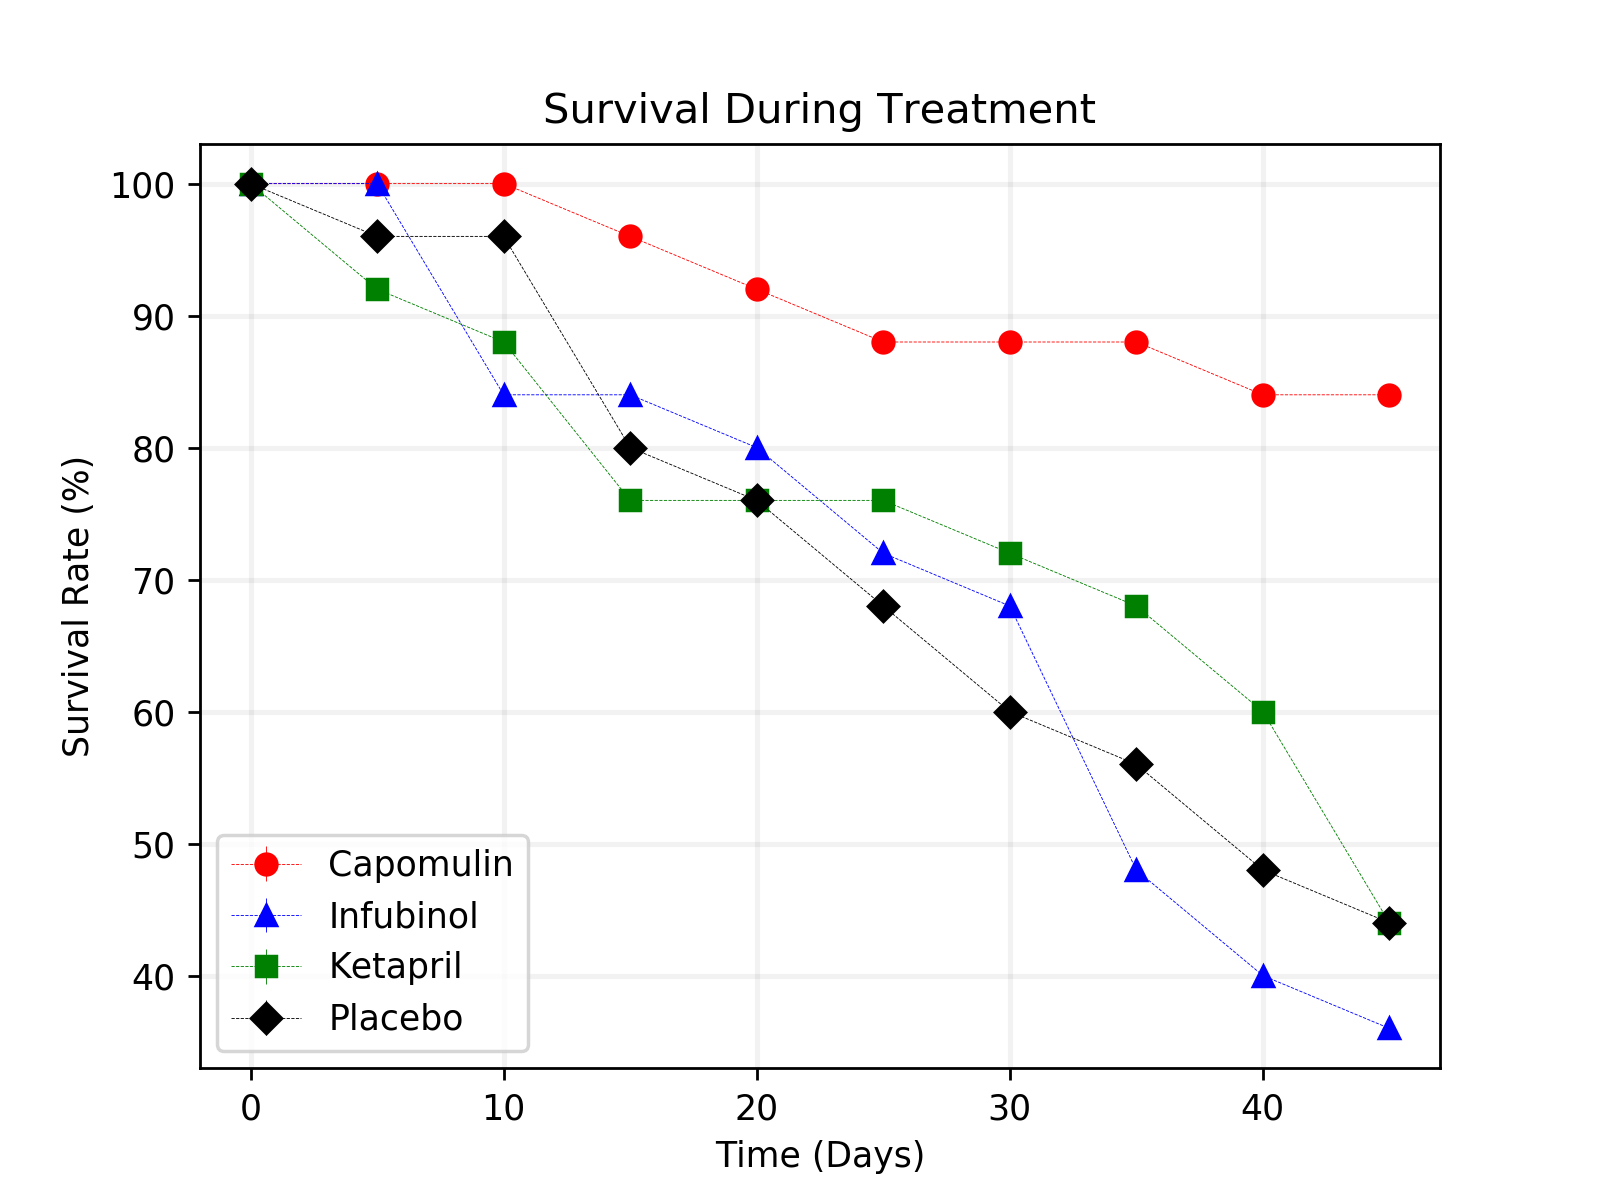

In [37]:
chartTrialOutcomes(val_df = rate_micesurvived_df,
                   sem_df = sem_ratesurvied_df, 
                   title = "Survival During Treatment", 
                   xlabel = "Time (Days)", 
                   ylabel = "Survival Rate (%)", 
                   file = "charts/survival.png",
                   xlim_offset=[-2,7],
                   ylim_offset=[3,-7],
                   vlines = True,
                   legend_loc = "lower left")

In [42]:
percenttchange_tumor_volume_df = mean_tumor_volume_df.copy()

In [43]:
percenttchange_tumor_volume_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [44]:
def returnTumorVolumePC(tumor_volume_at_start, volume_at_timepoint):
    volume_change = ((volume_at_timepoint - tumor_volume_at_start) / tumor_volume_at_start) * 100
    return volume_change

#loop through each column of percenttchange_tumor_volume_df and apply returnTumorVolumePC() to each value in a list comprehension
for col in percenttchange_tumor_volume_df.columns:
    tumor_volume_at_start = percenttchange_tumor_volume_df.loc[0,col]
    percenttchange_tumor_volume_df[col] = [returnTumorVolumePC(tumor_volume_at_start, x) for x in percenttchange_tumor_volume_df[col] ]
    
#get the last row of values from df, which correspond to the final percent tumor volume change
percenttchange_tumor_volume_df = percenttchange_tumor_volume_df.iloc[-1,:]

In [45]:
#percenttchange_tumor_volume_df = pd.DataFrame(percenttchange_tumor_volume_df)
percenttchange_tumor_volume_df

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64

<IPython.core.display.Javascript object>


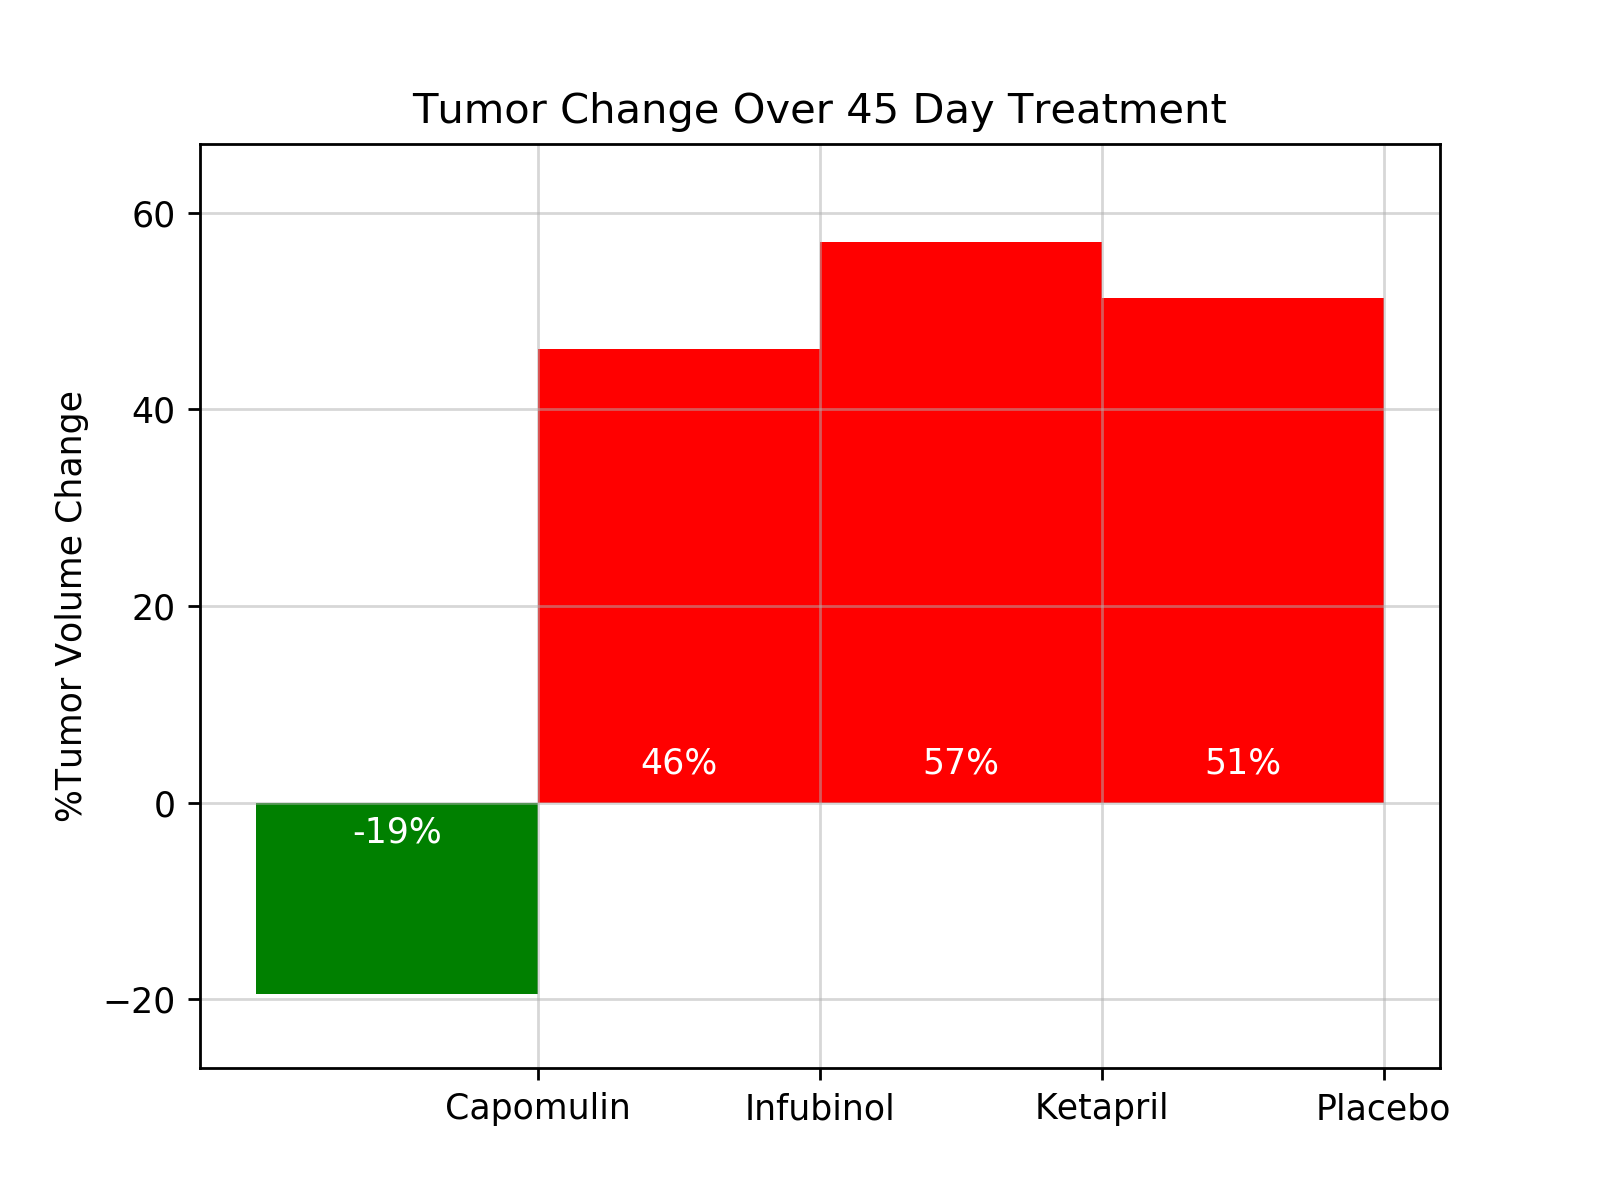

In [46]:
#Chart showing Tumor Change During 45 Day Treatment
drugs_to_chart = ["Capomulin","Infubinol","Ketapril","Placebo" ]
values = [percenttchange_tumor_volume_df.loc[drug] for drug in drugs_to_chart]
colors = ["green","red","red","red"]

fig, ax = plt.subplots()

# create bar graphs for each of the identified drugs
for i, drug in enumerate(drugs_to_chart):
        ax.bar(drug[i], values[i], color=colors[i], align="edge", width=-1)
        
        #we need to set the (x,y) values for the bar labels
        #start x at data point .5 and then add the current index value to the default,
        #so we continually place the new value along the x axis     
        x = -.5 + i  
        
        #check the value of the current drug value and then decide where to place the value on the y axis 
        if values[i] < 0:
            y = -3
        else:
            y=4            
    
        #place value labels on the bars 
        ax.text(x,y, "{:.0f}%".format(values[i]), color='white', ha='center', va='center')

plt.title("Tumor Change Over 45 Day Treatment")

# set x-axis values
x_axis=np.arange(0, len(drugs_to_chart))
plt.xticks(x_axis, drugs_to_chart, ha="center")

# set y-axis values
y_axis = [-20,0,20,40,60]
plt.yticks(y_axis)
plt.ylim(min(y_axis)-7, max(y_axis)+7)
plt.ylabel("%Tumor Volume Change")

plt.grid(alpha=0.5)
plt.show()

plt.savefig("charts/change.png")